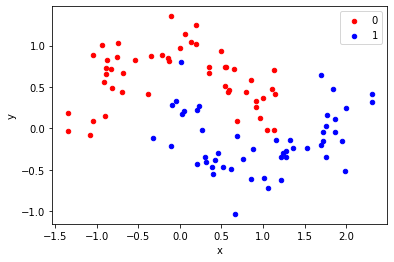

In [ ]:
# generate two moons dataset
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [ ]:
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [ ]:
testy.shape

(70,)

In [ ]:
# mlp overfit on the moons dataset
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu')) #hidden layer : uses 500 nodes 
model.add(Dense(1, activation='sigmoid'))  #output layer 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)

In [ ]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.914


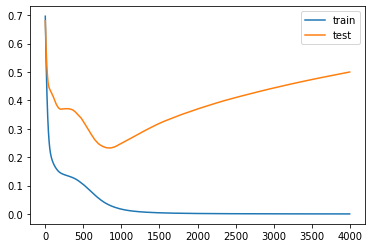

In [ ]:
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# We can see that the model has better performance on the training dataset than the test dataset, one possible sign of overfitting.

Epoch 00231: early stopping
Train: 0.967, Test: 0.814


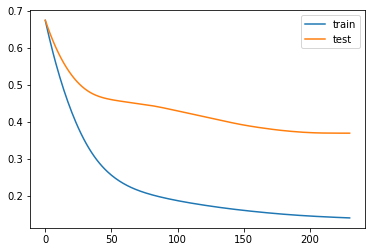

In [14]:

# mlp overfit on the moons dataset with simple early stopping
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # patient early stopping
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

#  simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es])
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Epoch 01016: early stopping
Train: 1.000, Test: 0.943


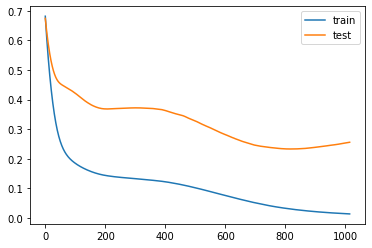

In [15]:

# mlp overfit on the moons dataset with simple early stopping
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

#  simple early stopping
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es])
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

This means that although the performance of the model has improved, we may not have the best performing or most stable model at the end of training. We can address this by using a ModelChecckpoint callback.

In this case, we are interested in saving the model with the best accuracy on the test dataset. We could also seek the model with the best loss on the test dataset, but this may or may not correspond to the model with the best accuracy.

This highlights an important concept in model selection. The notion of the “best” model during training may conflict when evaluated using different performance measures. Try to choose models based on the metric by which they will be evaluated and presented in the domain. In a balanced binary classification problem, this will most likely be classification accuracy. Therefore, we will use accuracy on the validation in the ModelCheckpoint callback to save the best model observed during training.

In [ ]:
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


In [16]:
# mlp overfit on the moons dataset with patient early stopping and model checkpointing
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot
from keras.models import load_model

# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es, mc])
# load the saved model
saved_model = load_model('best_model.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(trainX, trainy, verbose=0)
_, test_acc = saved_model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Epoch 00001: val_accuracy improved from -inf to 0.48571, saving model to best_model.h5

Epoch 00002: val_accuracy did not improve from 0.48571

Epoch 00003: val_accuracy did not improve from 0.48571

Epoch 00004: val_accuracy improved from 0.48571 to 0.52857, saving model to best_model.h5

Epoch 00005: val_accuracy improved from 0.52857 to 0.57143, saving model to best_model.h5

Epoch 00006: val_accuracy improved from 0.57143 to 0.61429, saving model to best_model.h5

Epoch 00007: val_accuracy improved from 0.61429 to 0.62857, saving model to best_model.h5

Epoch 00008: val_accuracy improved from 0.62857 to 0.68571, saving model to best_model.h5

Epoch 00009: val_accuracy did not improve from 0.68571

Epoch 00010: val_accuracy did not improve from 0.68571

Epoch 00011: val_accuracy did not improve from 0.68571

Epoch 00012: val_accuracy did not improve from 0.68571

Epoch 00013: val_accuracy did not improve from 0.68571

Epoch 00014: val_accuracy improved from 0.68571 to 0.70000, savi